In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
# Load data
amazon = pd.read_csv('amazon_data.csv')
display(amazon.head(5))
display(amazon.tail(5))
nn = amazon.shape[0]

,Year,Quarter,Year_quarter,Ticker,Revenue,Period
0,2001,1,2001Q1,AMZN,700.36,1
1,2001,2,2001Q2,AMZN,667.63,2
2,2001,3,2001Q3,AMZN,639.28,3
3,2001,4,2001Q4,AMZN,1115.17,4
4,2002,1,2002Q1,AMZN,847.42,5


,Year,Quarter,Year_quarter,Ticker,Revenue,Period
86,2022,3,2022Q3,AMZN,127100.0,87
87,2022,4,2022Q4,AMZN,149200.0,88
88,2023,1,2023Q1,AMZN,127360.0,89
89,2023,2,2023Q2,AMZN,134380.0,90
90,2023,3,2023Q3,AMZN,143080.0,91


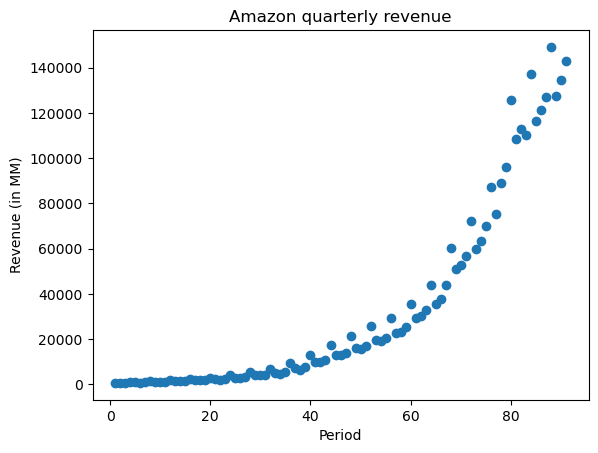

In [3]:
# Plot the Time Series
plt.plot(amazon['Period'], amazon['Revenue'], 'o')
plt.title('Amazon quarterly revenue')
plt.xlabel('Period')
plt.ylabel('Revenue (in MM)')
plt.show()

                            OLS Regression Results                            
Dep. Variable:                Revenue   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     271.2
Date:                Sun, 12 Nov 2023   Prob (F-statistic):           9.30e-29
Time:                        21:38:03   Log-Likelihood:                -1035.5
No. Observations:                  91   AIC:                             2075.
Df Residuals:                      89   BIC:                             2080.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -3.05e+04   4524.101     -6.742      0.0

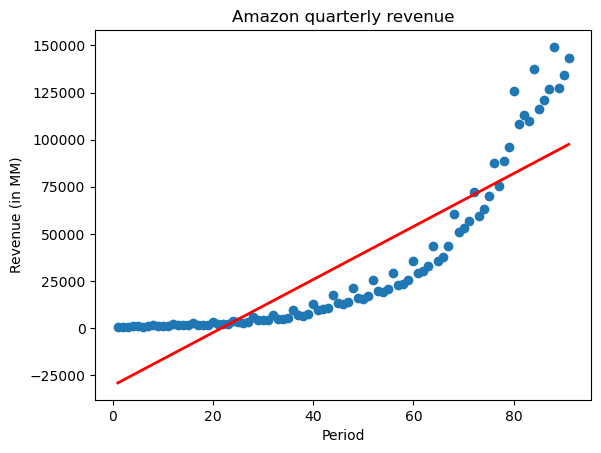

In [4]:
# Regression of Revenue and Period
X = sm.add_constant(amazon['Period'])
model1 = sm.OLS(amazon['Revenue'], X).fit()
print(model1.summary())
plt.plot(amazon['Period'], amazon['Revenue'], 'o')
plt.plot(amazon['Period'], model1.predict(X), color='red', linewidth=2)
plt.title('Amazon quarterly revenue')
plt.xlabel('Period')
plt.ylabel('Revenue (in MM)')
plt.show()

                            OLS Regression Results                            
Dep. Variable:              lnRevenue   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     6939.
Date:                Sun, 12 Nov 2023   Prob (F-statistic):           3.11e-86
Time:                        21:38:04   Log-Likelihood:                 24.609
No. Observations:                  91   AIC:                            -45.22
Df Residuals:                      89   BIC:                            -40.20
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.5428      0.039    165.775      0.0

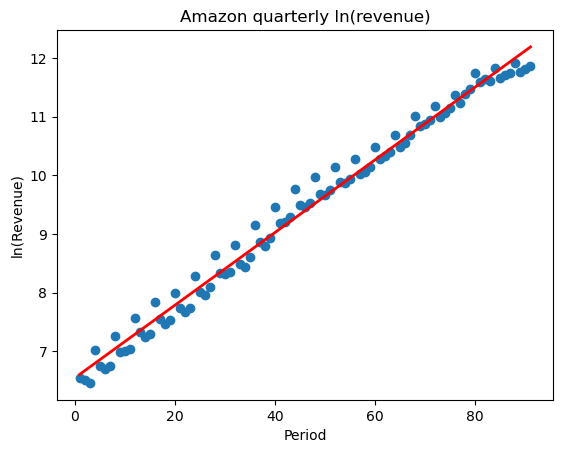

In [5]:
# Regression of ln(Revenue) and Period
amazon['lnRevenue'] = np.log(amazon['Revenue'])
X_ln = sm.add_constant(amazon['Period'])
model2 = sm.OLS(amazon['lnRevenue'], X_ln).fit()
print(model2.summary())
plt.plot(amazon['Period'], amazon['lnRevenue'], 'o')
plt.plot(amazon['Period'], model2.predict(X_ln), color='red', linewidth=2)
plt.title('Amazon quarterly ln(revenue)')
plt.xlabel('Period')
plt.ylabel('ln(Revenue)')
plt.show()

In [6]:
# Generate binary variables for quarters
amazon['is_Q1'] = np.where(amazon['Quarter'] == 1, 1, 0)
amazon['is_Q2'] = np.where(amazon['Quarter'] == 2, 1, 0)
amazon['is_Q3'] = np.where(amazon['Quarter'] == 3, 1, 0)
amazon['is_Q4'] = np.where(amazon['Quarter'] == 4, 1, 0)

In [7]:
# A regression model that considers Quarters
X_quarters = sm.add_constant(amazon[['Period', 'is_Q2', 'is_Q3', 'is_Q4']])
model3 = sm.OLS(amazon['lnRevenue'], X_quarters).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:              lnRevenue   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     4828.
Date:                Sun, 12 Nov 2023   Prob (F-statistic):          2.82e-100
Time:                        21:38:05   Log-Likelihood:                 72.369
No. Observations:                  91   AIC:                            -134.7
Df Residuals:                      86   BIC:                            -122.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.4991      0.031    210.137      0.0

In [8]:
###########################
# Autoregressive models
###########################
amazon['Lag1Revenue'] = amazon['Revenue'].shift(1)
amazon['Lag2Revenue'] = amazon['Revenue'].shift(2)
amazon['Lag3Revenue'] = amazon['Revenue'].shift(3)
amazon['Lag4Revenue'] = amazon['Revenue'].shift(4)
display(amazon.head(5))

,Year,Quarter,Year_quarter,Ticker,Revenue,Period,lnRevenue,is_Q1,is_Q2,is_Q3,is_Q4,Lag1Revenue,Lag2Revenue,Lag3Revenue,Lag4Revenue
0,2001,1,2001Q1,AMZN,700.36,1,6.551594,1,0,0,0,NaN,NaN,NaN,NaN
1,2001,2,2001Q2,AMZN,667.63,2,6.503734,0,1,0,0,700.36,NaN,NaN,NaN
2,2001,3,2001Q3,AMZN,639.28,3,6.460343,0,0,1,0,667.63,700.36,NaN,NaN
3,2001,4,2001Q4,AMZN,1115.17,4,7.016762,0,0,0,1,639.28,667.63,700.36,NaN
4,2002,1,2002Q1,AMZN,847.42,5,6.742196,1,0,0,0,1115.17,639.28,667.63,700.36


                            OLS Regression Results                            
Dep. Variable:                Revenue   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     2469.
Date:                Sun, 12 Nov 2023   Prob (F-statistic):           3.57e-66
Time:                        21:38:06   Log-Likelihood:                -935.59
No. Observations:                  90   AIC:                             1875.
Df Residuals:                      88   BIC:                             1880.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1024.5135   1080.579      0.948      

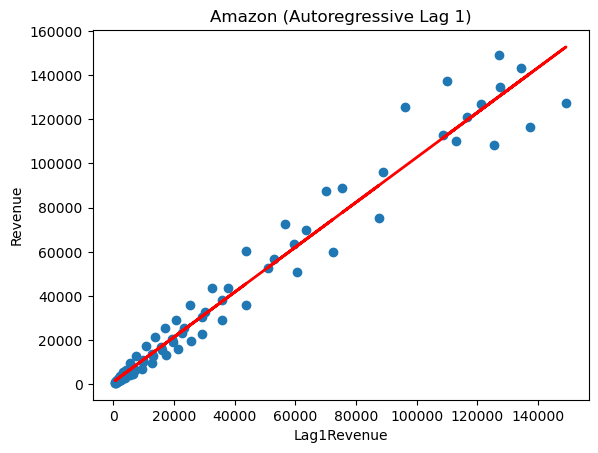

In [9]:
# Lag1 model
X_lag1 = sm.add_constant(amazon['Lag1Revenue'].dropna())
model4 = sm.OLS(amazon['Revenue'][1:], X_lag1).fit()
print(model4.summary())
plt.plot(amazon['Lag1Revenue'], amazon['Revenue'], 'o')
plt.plot(amazon['Lag1Revenue'][1:], model4.predict(X_lag1), color='red', linewidth=2)
plt.title('Amazon (Autoregressive Lag 1)')
plt.xlabel('Lag1Revenue')
plt.ylabel('Revenue')
plt.show()

In [10]:
# With Lag1-Lag4
X_lags = sm.add_constant(amazon[['Lag1Revenue', 'Lag2Revenue', 'Lag3Revenue', 'Lag4Revenue']].dropna())
model5 = sm.OLS(amazon['Revenue'][4:], X_lags).fit()
print(model5.summary())

                            OLS Regression Results                            
Dep. Variable:                Revenue   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     1779.
Date:                Sun, 12 Nov 2023   Prob (F-statistic):           8.65e-79
Time:                        21:38:07   Log-Likelihood:                -856.83
No. Observations:                  87   AIC:                             1724.
Df Residuals:                      82   BIC:                             1736.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1342.6336    655.981      2.047      

In [11]:
##############
## PREDICTION
##############

# Train/validation approach
train_data = amazon.iloc[:86, :]
validate_data = amazon.iloc[86:91, :]

In [12]:
# Train the 5 models on the training set
# and predict Revenue on the validation set
model1_train = sm.OLS(train_data['Revenue'], sm.add_constant(train_data['Period'])).fit()
model2_train = sm.OLS(train_data['lnRevenue'], sm.add_constant(train_data['Period'])).fit()
model3_train = sm.OLS(train_data['lnRevenue'], sm.add_constant(train_data[['Period', 'is_Q2', 'is_Q3', 'is_Q4']])).fit()
model4_train = sm.OLS(train_data['Revenue'][1:], sm.add_constant(train_data['Lag1Revenue'].dropna())).fit()
model5_train = sm.OLS(train_data['Revenue'][4:], sm.add_constant(train_data[['Lag1Revenue', 'Lag2Revenue', 'Lag3Revenue', 'Lag4Revenue']].dropna())).fit()

In [13]:
pred1 = model1_train.predict(sm.add_constant(validate_data['Period']))
pred2 = np.exp(model2_train.predict(sm.add_constant(validate_data['Period'])))
pred3 = np.exp(model3_train.predict(sm.add_constant(validate_data[['Period', 'is_Q2', 'is_Q3', 'is_Q4']])))
pred4 = model4_train.predict(sm.add_constant(validate_data['Lag1Revenue']))
pred5 = model5_train.predict(sm.add_constant(validate_data[['Lag1Revenue', 'Lag2Revenue', 'Lag3Revenue', 'Lag4Revenue']]))

In [14]:
# Compute srMSE
MSE1 = np.mean((validate_data['Revenue'] - pred1)**2)
MSE2 = np.mean((validate_data['Revenue'] - pred2)**2)
MSE3 = np.mean((validate_data['Revenue'] - pred3)**2)
MSE4 = np.mean((validate_data['Revenue'] - pred4)**2)
MSE5 = np.mean((validate_data['Revenue'] - pred5)**2)

# Print srMSE
print(f"\nModel 1:  MSE = {MSE1}\n"
      f"Model 2:  MSE = {MSE2}\n"
      f"Model 3:  MSE = {MSE3}\n"
      f"Model 4:  MSE = {MSE4}\n"
      f"Model 5:  MSE = {MSE5}\n")


Model 1:  MSE = 2783285735.6194553
Model 2:  MSE = 2745246770.6359005
Model 3:  MSE = 2520291367.185134
Model 4:  MSE = 211055906.68669632
Model 5:  MSE = 100515279.85671936



In [15]:
# The full autoregressive model is the best one at predicting the future.
# Retrain the optimal model on the entire sample
X_full = sm.add_constant(amazon[['Lag1Revenue', 'Lag2Revenue', 'Lag3Revenue', 'Lag4Revenue']].dropna())
model5_full = sm.OLS(amazon['Revenue'][4:], X_full).fit()
print(model5_full.summary())

                            OLS Regression Results                            
Dep. Variable:                Revenue   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     1779.
Date:                Sun, 12 Nov 2023   Prob (F-statistic):           8.65e-79
Time:                        21:38:11   Log-Likelihood:                -856.83
No. Observations:                  87   AIC:                             1724.
Df Residuals:                      82   BIC:                             1736.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1342.6336    655.981      2.047      

In [16]:
# Use it to produce predictions for the next quarter
newdata = pd.DataFrame({
    'const': [1],
    'Lag1Revenue': [amazon['Revenue'].iloc[-1]],
    'Lag2Revenue': [amazon['Revenue'].iloc[-2]],
    'Lag3Revenue': [amazon['Revenue'].iloc[-3]],
    'Lag4Revenue': [amazon['Revenue'].iloc[-4]]
})
display(newdata)

next_revenue = model5_full.predict(newdata)
print(next_revenue)

,const,Lag1Revenue,Lag2Revenue,Lag3Revenue,Lag4Revenue
0,1,143080.0,134380.0,127360.0,149200.0


0    167603.715538
dtype: float64


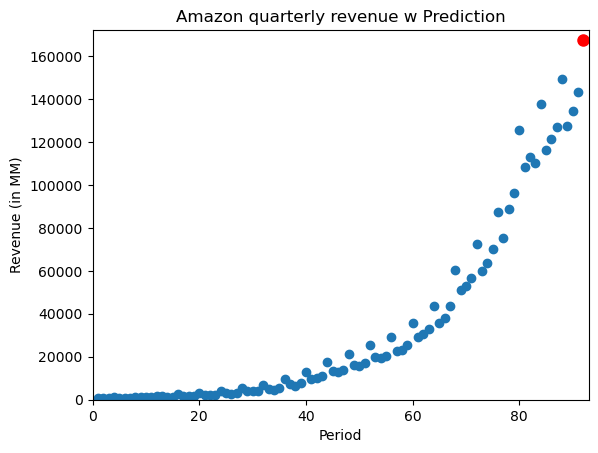

In [17]:
# Final plot with prediction
plt.plot(amazon['Period'], amazon['Revenue'], 'o')
plt.plot(92, next_revenue.values[0], 'o', color='red', markersize=8)
plt.title('Amazon quarterly revenue w Prediction')
plt.xlim(0, 93)
plt.ylim(0, 172000)
plt.xlabel('Period')
plt.ylabel('Revenue (in MM)')
plt.show()
